In [1]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer

# Data Pre-processing

In [2]:
df = pd.read_csv('/kaggle/input/fake-news/train.csv')

In [3]:
df.shape 

(20800, 5)

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.isnull().sum() 

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
df = df.fillna('') 

In [7]:
df.isnull().sum() 

id        0
title     0
author    0
text      0
label     0
dtype: int64

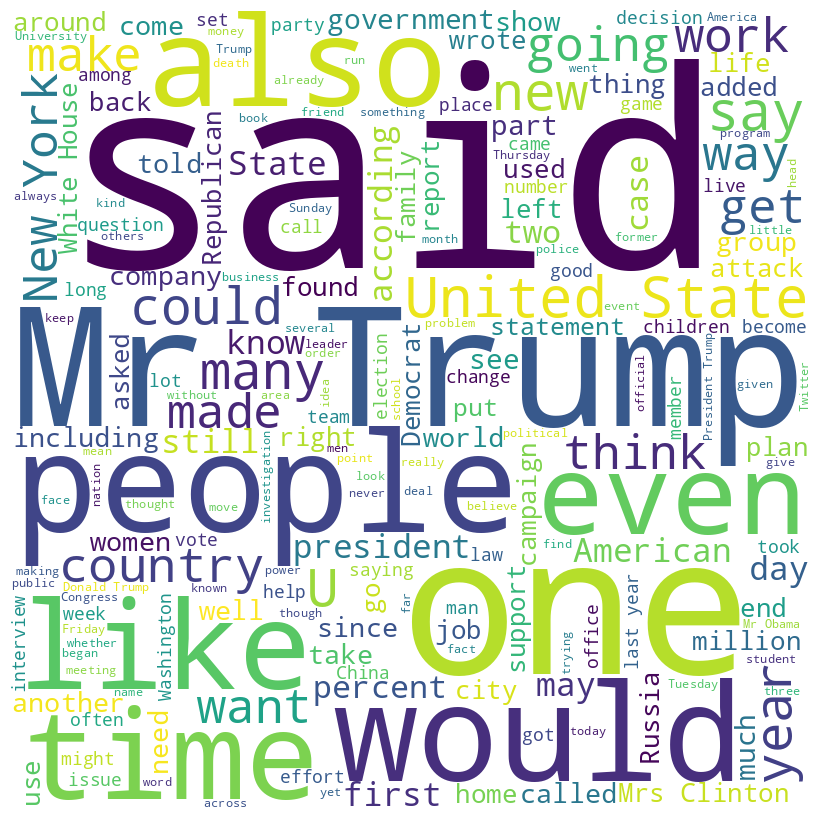

In [8]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 0].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

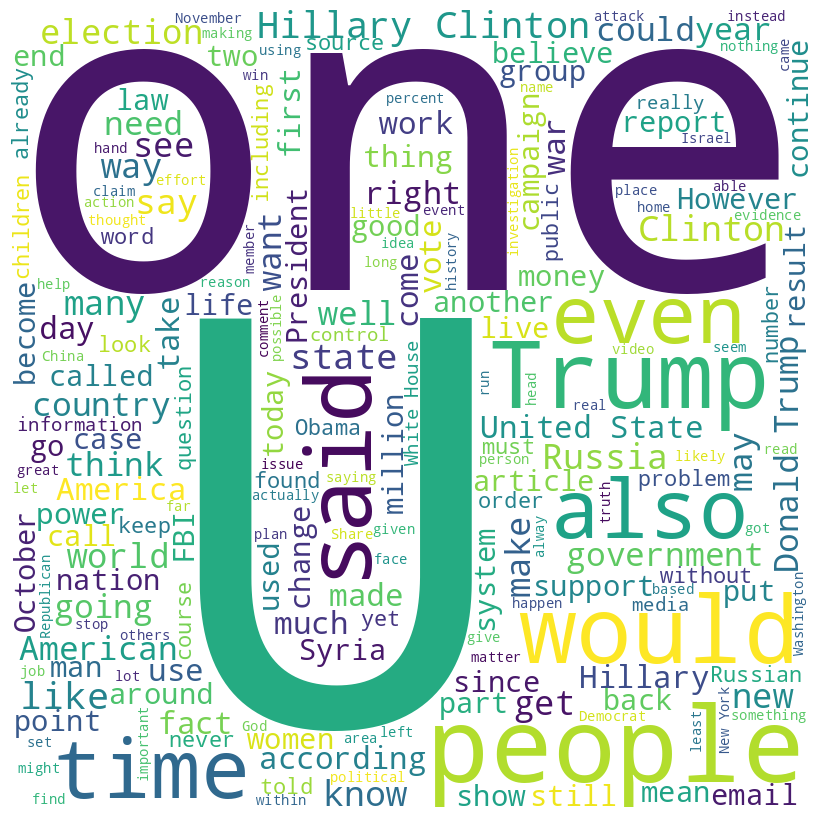

In [9]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df[df['label'] == 1].text)) 
  
# plot the word cloud for real news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [10]:
x_df = df['title']
y_df = df['label']

# Vectorization

In [11]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
print(tf_idf_matrix)

  (0, 20993)	0.19474659608460163
  (0, 20360)	0.28742097773915143
  (0, 20010)	0.3768145560270482
  (0, 17169)	0.24375630561009903
  (0, 11216)	0.26912270344212486
  (0, 10326)	0.3023289263011112
  (0, 10247)	0.16582278445384005
  (0, 9386)	0.20041027857069765
  (0, 6878)	0.24926429301181982
  (0, 5568)	0.2668922837502577
  (0, 5246)	0.2706852894484654
  (0, 4029)	0.22205447121783736
  (0, 3457)	0.33072883488177524
  (0, 822)	0.28502782091086426
  (1, 21334)	0.39360717600312567
  (1, 13507)	0.21060274898999704
  (1, 9155)	0.24935186416138613
  (1, 7669)	0.4821092709819335
  (1, 3836)	0.25244659620182697
  (1, 3147)	0.5009555435818291
  (1, 2752)	0.20822336759105836
  (1, 2284)	0.38480054625610366
  (2, 21548)	0.30696759622100733
  (2, 21179)	0.3347280896066456
  (2, 19920)	0.43134210729209976
  :	:
  (20797, 19486)	0.09292089521946761
  (20797, 19334)	0.07527441601260844
  (20797, 19072)	0.3521422215000689
  (20797, 16785)	0.2782265988101692
  (20797, 15718)	0.3552849830462018
  (20797

In [12]:
# Splitting the data into test data and train data
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, y_df, random_state=0)

# Logistic Regression

In [13]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
x_predict = classifier.predict(x_test)

accuracy:   93.019


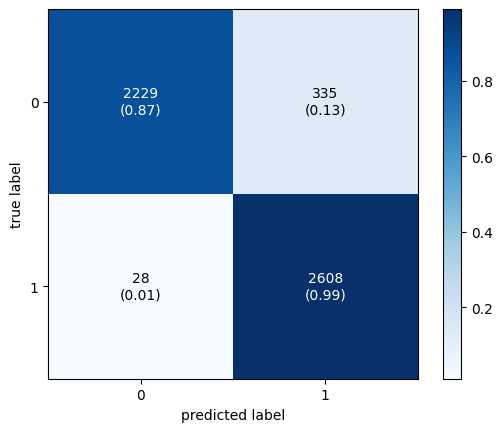

In [14]:
score = metrics.accuracy_score(y_test, x_predict)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, x_predict, labels=[0,1])

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, x_predict),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# MultiNomial Naive Bayes

In [15]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
x_predict = classifier.predict(x_test)

accuracy:   86.538


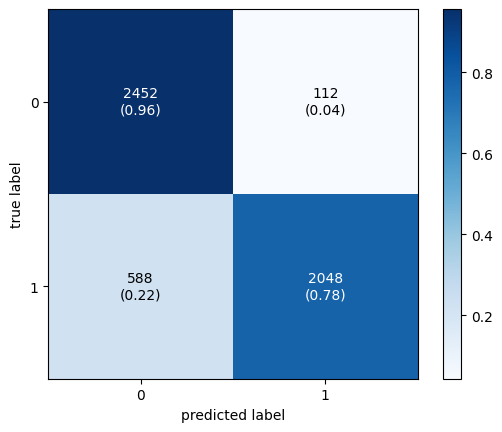

In [16]:
score = metrics.accuracy_score(y_test, x_predict)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, x_predict, labels=[0,1])

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, x_predict),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# SVM (SUPPORT VECTOR MACHINE)

In [17]:
classifier = SVC(kernel="linear") 
classifier.fit(x_train, y_train)
x_predict = classifier.predict(x_test)

accuracy:   93.885


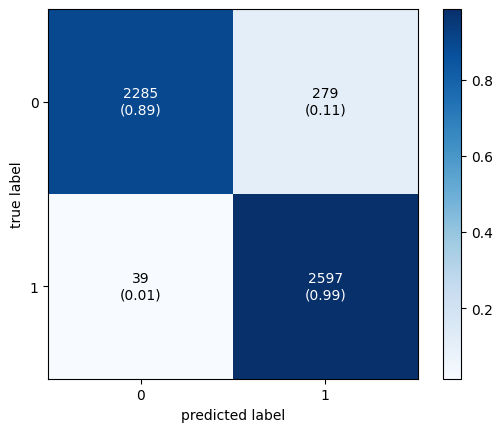

In [18]:
score = metrics.accuracy_score(y_test, x_predict)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, x_predict, labels=[0,1])

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, x_predict),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()